In [1]:
import pandas as pd
import numpy as np

#### 1.	What is a neural network? What are the general steps required to build a neural network? 

Neural network is a function that fits some data. 
In its simplest form, there is a single function fitting some data as shown below. This structure is called a neuron.

A neural network combines multiples neurons. Think of neurons as the building blocks of a neural network.

Each input is fed to each neuron. The neural network will figure out by itself which function fits best the data. All you need to provide are the inputs and the output.

*General steps to build a neural network*

    - Importing required packages
    - Data loading and pre-processing
    - Train-Test splitting
    - Constructing a neural network 
        - forward propogation 
            Each hidden layer has a weight and activation function
        - back propogation
             Once we have defined a loss metric e for evaluating performance, 
             we would like to know how the loss metric change when we perturb each weight or bias.
        - Iterative Optimization
            Once we know the sensitivities of weights and biases, 
            we try to minimize (hence the minus sign) the loss metric iteratively by gradient descent 
     - Check the performance metrics on test data

#### 2.	Generally, how do you check the performance of a neural network? Why? 



Depending on the type of data (classification or regression) performance metric is checked on validation set or test data.

As the neural network has high capability of learning, overfitting could be an issue. In such a case, the neural netwok performs good with training data but doesn't score good with test data.

#### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
    Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
    Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [2]:
abalone_df = pd.read_csv("../Datasets/abalone/abalone.data")
abalone_df.columns = ['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [3]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
# Preprocessing

abalone_df = pd.get_dummies(abalone_df,prefix=["Sex"], columns = ["Sex"], drop_first=True)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

X = abalone_df.drop('Rings',axis=1)
y = abalone_df['Rings']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=25)

X_train = pipe.fit_transform(X_train)

In [5]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from numpy.random import seed

seed(25)
n_cols = X_train.shape[1]

model = Sequential()

model.add(Dense(500,activation='relu',input_shape=(n_cols,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 2)

model.fit(X_train,y_train, callbacks=[early_stopping_monitor], epochs=20, validation_split=0.3)

Epoch 1/20
64/64 [==============================] - 2s 17ms/step - loss: 12.9922 - val_loss: 8.4353
Epoch 2/20
64/64 [==============================] - 0s 8ms/step - loss: 5.9296 - val_loss: 9.1417
Epoch 3/20
64/64 [==============================] - 1s 9ms/step - loss: 5.3086 - val_loss: 7.0615
Epoch 4/20
64/64 [==============================] - 1s 9ms/step - loss: 5.1570 - val_loss: 7.0035
Epoch 5/20
64/64 [==============================] - 1s 8ms/step - loss: 5.1446 - val_loss: 7.1583
Epoch 6/20
64/64 [==============================] - 0s 7ms/step - loss: 4.9788 - val_loss: 6.5827
Epoch 7/20
64/64 [==============================] - 0s 7ms/step - loss: 4.7420 - val_loss: 7.1197
Epoch 8/20
64/64 [==============================] - 1s 9ms/step - loss: 4.7918 - val_loss: 6.8467


In [6]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
mean_absolute_error(y_test, y_pred)

RMSE : 2.6641001531868933


2.159846609531168

#### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

seed(25)
knr = KNeighborsRegressor()

parameters = {"n_neighbors": range(2, 40),
              "weights": ["uniform", "distance"]}

gridsearch_knr = GridSearchCV(knr, parameters, cv=10)
gridsearch_knr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [8]:
gridsearch_knr.best_estimator_

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [9]:
model_2 = gridsearch_knr.best_estimator_
y_pred_2 = model_2.predict(X_test)
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred_2)))
mean_absolute_error(y_test, y_pred_2)

RMSE : 3.103025527648412


C:\Python38\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


2.4236325682953996

#### 5.	Create a neural network using pytorch to predict the same result as question 3. 


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_test = pipe.fit_transform(X_test)

X_train = torch.FloatTensor(X_train) 
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)

C:\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [14]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=9,hidden1=20,hidden2=20,out_features=1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [15]:
torch.manual_seed(25)

ann = ANN_Model()

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(ann.parameters(),lr=0.01)

final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train.float())
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
        
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() 
    optimizer.step() #perform one optimization step each epoch

C:\Python38\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([2923])) that is different to the input size (torch.Size([2923, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch number: 1 with loss: 100.88021850585938
Epoch number: 11 with loss: 15.03194808959961
Epoch number: 21 with loss: 11.878092765808105
Epoch number: 31 with loss: 11.245284080505371
Epoch number: 41 with loss: 11.03705883026123
Epoch number: 51 with loss: 10.952107429504395
Epoch number: 61 with loss: 10.911794662475586
Epoch number: 71 with loss: 10.889457702636719
Epoch number: 81 with loss: 10.875813484191895
Epoch number: 91 with loss: 10.866569519042969
Epoch number: 101 with loss: 10.8596773147583
Epoch number: 111 with loss: 10.854223251342773
Epoch number: 121 with loss: 10.8496675491333
Epoch number: 131 with loss: 10.845792770385742
Epoch number: 141 with loss: 10.842462539672852
Epoch number: 151 with loss: 10.839532852172852
Epoch number: 161 with loss: 10.836955070495605
Epoch number: 171 with loss: 10.834671020507812
Epoch number: 181 with loss: 10.832625389099121
Epoch number: 191 with loss: 10.830774307250977
Epoch number: 201 with loss: 10.8291015625
Epoch number: 

In [16]:
#predictions
y_pred_3 = []

with torch.no_grad(): #decreases memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred_3.append(prediction.min()) #returns index with max element in each prediction set

In [17]:
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred_3)))
mean_absolute_error(y_test, y_pred_3)

RMSE : 3.090781189299328


2.315042730150276

#### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

Neural Network built by Keras performed the best. Followed by PyTorch.

In nutshell the neural network perforned exceptionally well than other algorithm.

#### DataCamp's Intoduction to Deep Learning in Python

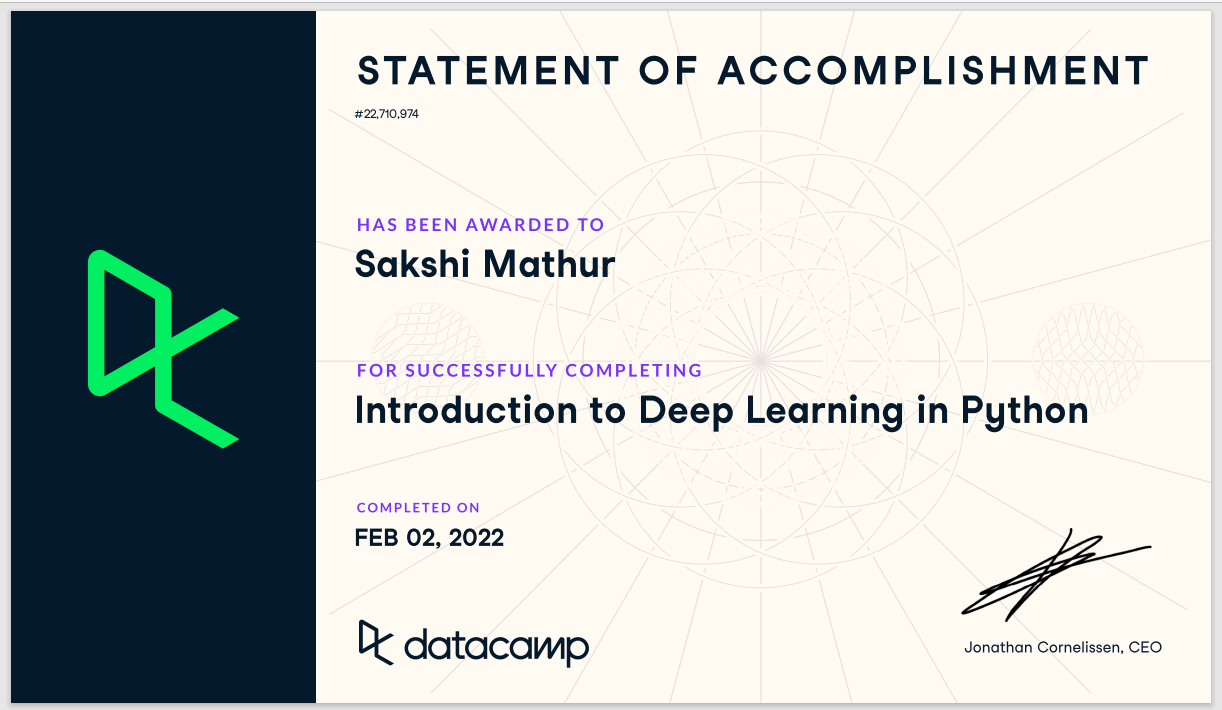